<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
# Checking Null Values

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# Drop 'Unnamed: 32' Features

df.drop(columns = 'Unnamed: 32', inplace = True)

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df_one = pd.get_dummies(df.diagnosis)
df_one

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [7]:
drop_columns = ['diagnosis', 'M']
rename_columns = {
    'B' : 'is_cancer'
}



df = pd.concat((df, df_one), axis = 1)
df = df.drop(columns = drop_columns, axis = 1)
df = df.rename(columns = rename_columns)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,is_cancer
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
X = df.drop(columns = ['id', 'is_cancer'])
y = df['is_cancer']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y , random_state = 42)

In [11]:
log = LogisticRegression(max_iter = 2000)

log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [12]:
# Train Accuracy score
train_accuracy = log.score(X_train, y_train)
print('Train Accuracy ', train_accuracy)

Train Accuracy  0.9582417582417583


In [13]:
#Test Accuracy score
test_accuracy = log.score(X_test, y_test)
print('Test Accuracy ', test_accuracy)

Test Accuracy  0.9649122807017544


In [14]:
y_pred= log.predict(X_test)

# predict test probability:
prob_preds = log.predict_proba(X_test)

In [15]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Outcome values \n', tp, fn, fp, tn)

Outcome values 
 70 2 2 40


In [16]:
np.mean(cross_val_score(log, X_train, y_train, cv = 5))

C:\Users\darry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9494505494505494

In [17]:
np.mean(cross_val_score(log, X_test, y_test, cv = 5))

0.9391304347826086

In [18]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [19]:
# Confusion Matrix
cm_index = ['is_cancer', 'is_healthy']
cm_columns = ['predicted_cancer', 'predicted_healthy']
cm = confusion_matrix(y_pred, y_test)
cm = pd.DataFrame(cm, index = cm_index, columns = cm_columns)
cm

,predicted_cancer,predicted_healthy
is_cancer,40,2
is_healthy,2,70


### Accuracy

In [20]:
accuracy = (tp + tn) / float(tp + tn + fp + fn)
print('Classification accuracy: ', accuracy)

Classification accuracy:  0.9649122807017544


### Classification Error

In [21]:
classification_error = (fp + fn)/ float(tp + tn + fp + fn)
print('Classification error is ', classification_error)

Classification error is  0.03508771929824561


### Sensitivity

In [22]:
tpr = tp / float(fn + tp)
print('tpr is ', tpr)

tpr is  0.9722222222222222


### The Receiver operating characteristc (ROC) curve

In [23]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [24]:
from sklearn.svm import SVC

In [25]:
X = df.drop(columns = ['id', 'is_cancer'])
y = df['is_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y , random_state = 42)

In [26]:
svc = SVC(kernel = 'linear', probability = True)

In [27]:
svc.fit(X_train, y_train)
train_accuracy_score = svc.score(X_train, y_train)
print('Train Accuracy Score ', train_accuracy_score)

Train Accuracy Score  0.9582417582417583


In [28]:
test_accuracy_score = svc.score(X_test, y_test)
print('Test Accuracy Score ', test_accuracy_score)

Test Accuracy Score  0.956140350877193


In [29]:
# predict test class
y_pred= svc.predict(X_test)

# predict test probability:
preds = svc.predict_proba(X_test)

In [30]:
svc_tp, svc_fn, svc_fp, svc_tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Outcome values \n', svc_tp, svc_fn, svc_fp, svc_tn)

Outcome values 
 71 1 4 38


In [31]:
cm_index = ['is_cancer', 'is_healthy']
cm_columns = ['predicted_cancer', 'predicted_healthy']
svc_cm = confusion_matrix(y_pred, y_test)
svc_cm = pd.DataFrame(svc_cm, index = cm_index, columns = cm_columns)
svc_cm

,predicted_cancer,predicted_healthy
is_cancer,38,1
is_healthy,4,71


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
X = df.drop(columns = ['id', 'is_cancer'])
y = df['is_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y , random_state = 42)

In [35]:
gaussianNB = GaussianNB()

In [36]:
gaussianNB.fit(X_train, y_train)
train_accuracy = gaussianNB.score(X_train, y_train)
print('Train accuracy ', train_accuracy)

Train accuracy  0.9406593406593406


In [37]:
gaussianNB.fit(X_test, y_test)
test_accuracy = gaussianNB.score(X_test, y_test)
print('Test accuracy ', test_accuracy)

Test accuracy  0.9649122807017544


In [38]:
# predict test class
y_pred= gaussianNB.predict(X_test)

# predict test probability:
preds = gaussianNB.predict_proba(X_test)

In [39]:
gaussian_tp, gaussian_fn, gaussian_fp, gaussian_tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Outcome values \n', gaussian_tp, gaussian_fn, gaussian_fp, gaussian_tn)

Outcome values 
 72 0 4 38


In [40]:
cm_index = ['is_cancer', 'is_healthy']
cm_columns = ['predicted_cancer', 'predicted_healthy']
gaussianNB_cm = confusion_matrix(y_pred, y_test)
gaussianNB_cm = pd.DataFrame(gaussianNB_cm, index = cm_index, columns = cm_columns)
gaussianNB_cm

,predicted_cancer,predicted_healthy
is_cancer,38,0
is_healthy,4,72


### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

In [41]:
from sklearn.model_selection import GridSearchCV

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [42]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_grid = GridSearchCV(estimator = LogisticRegression(),
            param_grid = lr_params)

lr_grid.fit(X, y)

C:\Users\darry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\darry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\darry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\darry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\darry\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\darry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\darry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [43]:
print('Best Score for Logistic Regression', lr_grid.best_score_)
print('Best Estimator for Logistic Regression', lr_grid.best_estimator_.C)

Best Score for Logistic Regression 0.9472752678155567
Best Estimator for Logistic Regression 1


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [44]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_grid = GridSearchCV(estimator = svc, 
                        param_grid = svc_params)
svc_grid.fit(X, y)

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [45]:

print('SVC best score is ',svc_grid.best_score_)
print('SVC best estimator is ', svc_grid.best_estimator_.C)

SVC best score is  0.9631268436578171
SVC best estimator is  100


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

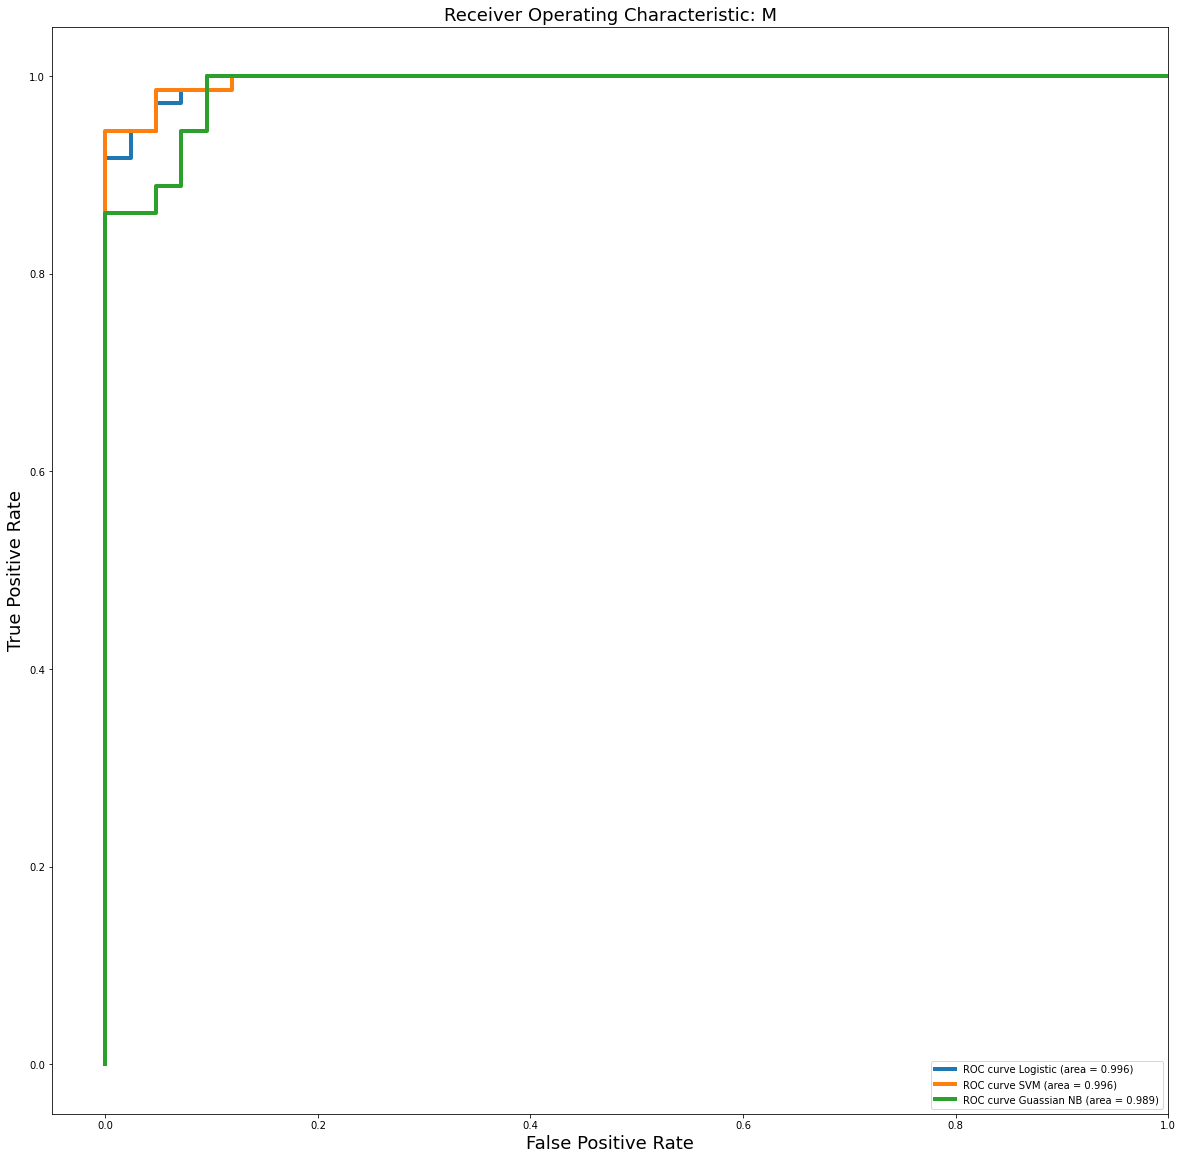

In [46]:
log_preds = log.predict_proba(X_test)
svm_preds = svc.predict_proba(X_test)
gaussian_preds = gaussianNB.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, log_preds[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_preds[:,1])
gaussian_fpr, gaussian_tpr, _ = roc_curve(y_test, gaussian_preds[:,1])



plt.figure(figsize=[20,20])

log_auc = auc(fpr, tpr)
svm_auc = auc(svm_fpr, svm_tpr)
gaussian_nb_auc = auc(gaussian_fpr, gaussian_tpr)

plt.plot(fpr, tpr, label = 'ROC curve Logistic (area = %0.3f)' %log_auc, linewidth = 4)
plt.plot(svm_fpr, svm_tpr, label = 'ROC curve SVM (area = %0.3f)' %svm_auc, linewidth = 4)
plt.plot(gaussian_fpr, gaussian_tpr, label = 'ROC curve Guassian NB (area = %0.3f)' % gaussian_nb_auc, linewidth = 4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



